# Aviation Data Analysis Notebook

In [95]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [96]:
#read in data
df_og = pd.read_csv("data/Aviation_Data.csv")
df = df_og.copy()

print(df.info(), '\n \n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Preliminary Formatting Change and Filtering

In [111]:
# Replaces "." with "_" in column names for ease of copy, paste
df.columns = df.columns.str.replace('.', "_")

# Extracting year from Event Date to assess how data changes by year
df['Year'] = [str(year).split('-')[0] for year in df['Event_Date']]
# Filtering dataframe to only show entries in Aircraft_Category that are Airplane
df = df.loc[df['Aircraft_Category'] == 'Airplane']
# The company will utilize professionally built planes. To best understand risk assodciated wiht professionally
# built planes, amateur-built will be removed from the dataset.
df = df.loc[df['Amateur_Built'] == 'No']
# Filtering dataframe to only show entries that have a Year 2000 as there were stricter air regulations enforced after 9/11
# and it makes sense to only show data around 20 years back from our problem
df = df.loc[df['Year'].astype(int) > 2000]
#Filtering out entries from Purpose_of_flight that arent one of 7 categories(Personal, Business, Executive/Corporate,
#Public Aircraft - Federal, Public Aircraft - State, Public Aircraft - Local or Public Aircraft)
#This is because we are looking to find an aircraft specifically for commercial and private activities
df = df.loc[df['Purpose_of_flight'].isin(['Personal','Business', 'Executive/corporate', 'Public Aircraft - Federal',
                                         'Public Aircraft - State', 'Public Aircraft - Local', 'Public Aircraft'])]

# Same Makes showing up as different because of capitalization. Changing all Makes and Model to Title case
df['Make'] = str(df['Make']).title()
df['Model'] = str(df['Model']).title()
# Since the ultimate goal is to make recommendations about Make and Model, all events without
# information about Make or Model will be filtered out.
df = df.dropna(subset=['Make', 'Model'])

print(df.info(), '\n \n')
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12380 entries, 49949 to 90345
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                12380 non-null  object 
 1   Investigation_Type      12380 non-null  object 
 2   Accident_Number         12380 non-null  object 
 3   Event_Date              12380 non-null  object 
 4   Location                12379 non-null  object 
 5   Country                 12380 non-null  object 
 6   Latitude                12264 non-null  object 
 7   Longitude               12259 non-null  object 
 8   Airport_Code            9000 non-null   object 
 9   Airport_Name            8995 non-null   object 
 10  Injury_Severity         12365 non-null  object 
 11  Aircraft_damage         12318 non-null  object 
 12  Aircraft_Category       12380 non-null  object 
 13  Registration_Number     12349 non-null  object 
 14  Make                    12380 non-

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
49949,20010119X00328,Accident,ATL01FA021,2001-01-14,"Troy, AL",United States,31.866667,-86.016667,TOI,Troy Municipal,...,NaN,NaN,2.0,NaN,NaN,VMC,Landing,Probable Cause,05-04-2010,2001
49961,20010131X00376,Accident,MIA01WA066,2001-01-17,"DIJON, France",France,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Foreign,NaN,2001
49991,20010206X00396,Accident,ATL01FA027,2001-01-24,"Nashville, TN",United States,36.13,-86.653889,BNA,Nashville International Airpor,...,NaN,4.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,25-09-2014,2001
49999,20010206X00402,Accident,LAX01WA084,2001-01-26,"Newman, Australia",Australia,-23.811667,119.803333,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Foreign,NaN,2001
50058,20010213X00442,Accident,DEN01LA050,2001-02-06,"PINEDALE, WY",United States,NaN,NaN,KPNA,PINEDALE,...,NaN,NaN,NaN,NaN,8.0,IMC,Approach,Probable Cause,21-04-2016,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90318,20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,325736N,1114536W,CGZ,Casa Grande Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,13-12-2022,2022
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"Alabaster, AL",United States,331040N,0086470W,EET,NaN,...,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022


### Dataframe column assessment changes

In [99]:
for i in range(len(df.columns)):
    print(df.iloc[:,i].value_counts(), '\n')

20220212104630    2
20221112106276    2
20070111X00042    2
20220727105589    2
20071227X02001    2
                 ..
20200818X01327    1
20210407102891    1
20150112X62619    1
20140706X50329    1
20110609X91648    1
Name: Event_Id, Length: 21114, dtype: int64 

Accident    19699
Incident     1451
Name: Investigation_Type, dtype: int64 

DCA22WA172    2
ERA22LA119    2
ERA22LA364    2
DCA22LA135    2
DCA22WA089    2
             ..
NYC06CA168    1
WPR11LA401    1
WPR11CA298    1
WPR20LA009    1
ERA17CA087    1
Name: Accident_Number, Length: 21131, dtype: int64 

2011-07-23    15
2012-08-31    14
2018-09-01    14
2011-06-18    13
2008-08-02    13
              ..
2014-02-27     1
2019-01-15     1
2002-12-26     1
2006-10-08     1
2021-08-19     1
Name: Event_Date, Length: 6502, dtype: int64 

Anchorage, AK       95
Talkeetna, AK       68
Phoenix, AZ         67
Atlanta, GA         66
Fairbanks, AK       65
                    ..
Burwell, NE          1
Grand Bay, AL        1
ORLEANS, F

#### Event IDs

In [100]:
#Event IDs
event_id_series = df['Event_Id'].value_counts()
event_id_series

20220212104630    2
20221112106276    2
20070111X00042    2
20220727105589    2
20071227X02001    2
                 ..
20200818X01327    1
20210407102891    1
20150112X62619    1
20140706X50329    1
20110609X91648    1
Name: Event_Id, Length: 21114, dtype: int64

In [101]:
#code to assess duplicate Event IDs
event_id_series.loc[event_id_series.values > 1]

20220212104630    2
20221112106276    2
20070111X00042    2
20220727105589    2
20071227X02001    2
20220822105776    2
20050817X01269    2
20220921105978    2
20061002X01435    2
20220718105496    2
20220929106019    2
20220804105661    2
20220614105258    2
20220111104514    2
20220801105632    2
20060601X00665    2
20050825X01313    2
20061020X01542    2
20080213X00187    2
20070426X00458    2
20220406104897    2
20051206X01938    2
20220323104818    2
20220309104747    2
20010226X00510    2
20051213X01965    2
20070618X00759    2
20071108X01768    2
20220623105317    2
20220818105763    2
20070705X00879    2
20030625X00951    2
20220608105217    2
20061015X01521    2
20220726105577    2
20220808105682    2
Name: Event_Id, dtype: int64

In [102]:
df['Aircraft_damage'].value_counts()

Substantial    16882
Destroyed       2208
Minor            779
Unknown           97
Name: Aircraft_damage, dtype: int64

In [103]:
df['FAR_Description'].value_counts()

091                              13409
Part 91: General Aviation         2404
NUSN                              1122
NUSC                               804
137                                742
121                                653
135                                540
UNK                                228
129                                202
Part 137: Agricultural             144
PUBU                               125
Part 121: Air Carrier               68
Part 135: Air Taxi & Commuter       61
Non-U.S., Non-Commercial            60
Non-U.S., Commercial                51
091K                                14
Public Use                          12
Unknown                             11
Part 129: Foreign                    8
125                                  5
ARMF                                 4
Part 125: 20+ Pax,6000+ lbs          1
107                                  1
Part 91 Subpart K: Fractional        1
Name: FAR_Description, dtype: int64

In [104]:
df['Purpose_of_flight'].value_counts()

Personal                     11664
Instructional                 2739
Aerial Application             926
Business                       490
Positioning                    345
Unknown                        236
Aerial Observation             160
Other Work Use                 150
Skydiving                      132
Flight Test                    120
Executive/corporate            103
Ferry                          101
Banner Tow                      89
Public Aircraft - Federal       52
Air Race show                   48
Glider Tow                      35
Public Aircraft                 35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
ASHO                             5
Air Race/show                    4
Air Drop                         3
PUBS                             3
External Load                    1
Name: Purpose_of_flight, dtype: int64

In [105]:
inv_years = df['Year']
inv_years_dist = inv_years.value_counts().sort_index()
inv_years_dist

2001      69
2002      80
2003     160
2004     434
2005     613
2006     629
2007     836
2008    1419
2009    1241
2010    1325
2011    1333
2012    1285
2013    1130
2014    1106
2015    1151
2016    1267
2017    1231
2018    1247
2019    1227
2020    1062
2021    1142
2022    1163
Name: Year, dtype: int64

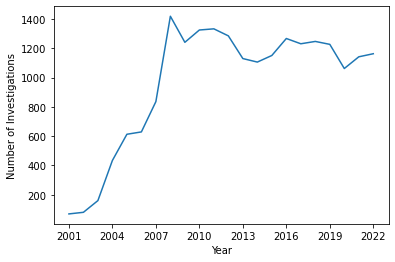

In [106]:
fig, ax = plt.subplots()

ax.plot(inv_years_dist.index, inv_years_dist.values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

ax.set_ylabel('Number of Investigations')
ax.set_xlabel("Year")
plt.show()